# Verificación Exhaustiva de la Calidad de Datos del Dataset "Annotated Dataset for Knee Arthritis Detection"

## Propósito
El propósito de este notebook es realizar una verificación exhaustiva de la calidad de los datos del dataset "Annotated Dataset for Knee Arthritis Detection". Esta verificación es esencial para asegurar que los datos sean adecuados para el desarrollo de modelos de machine learning precisos y fiables.

## Metodología
El análisis se ha estructurado en una serie de pasos para cubrir todos los aspectos críticos de la calidad de los datos:

1. **Formatos de Imagen:** Verificación de que todas las imágenes están en el formato correcto.
2. **Datos Faltantes:** Identificación de cualquier dato faltante en el dataset.
3. **Verificación de Resolución y Claridad de las Imágenes:** Evaluación de la resolución y claridad de las imágenes para asegurar que sean de calidad suficiente.
4. **Verificación y Extracción de Metadatos:** Extracción y verificación de los metadatos asociados con las imágenes.
5. **Detección de Artefactos y Problemas de Calidad:** Identificación de artefactos visuales y problemas de calidad en las imágenes.
6. **Verificación de Balance de Categorías:** Evaluación del balance de las diferentes categorías de imágenes en el dataset.
7. **Verificación de Consistencia de Etiquetas:** Verificación de la consistencia en las etiquetas de las imágenes.
8. **Verificación de Datos Faltantes:** Revisión adicional para identificar datos faltantes.
9. **Conteo de Rodillas en las Imágenes:** Conteo del número de rodillas visibles en cada imagen.
10. **Orientación:** Verificación de la orientación correcta de las imágenes.
11. **Consistencia en los Nombres de Archivo:** Verificación de la consistencia en los nombres de los archivos de imagen.
12. **Consistencia de la Iluminación:** Evaluación de la consistencia en la iluminación de las imágenes.
13. **Privacidad y Ética:** Verificación de que se cumplen las consideraciones de privacidad y ética en el manejo de las imágenes.
14. **Duplicados:** Identificación de imágenes duplicadas en el dataset.
15. **Integridad del Archivo:** Verificación de la integridad de los archivos de imagen.
16. **Verificación de la Exposición:** Evaluación de la exposición de las imágenes.
17. **Verificación de Sombras:** Identificación y evaluación de las sombras en las imágenes.
18. **Análisis de Borde:** Evaluación de la nitidez de los bordes en las imágenes.
19. **Verificación de Anomalías:** Detección de posibles anomalías en las imágenes.
20. **Verificación de la Posición:** Verificación de la posición de las imágenes.

## Resultados Esperados
Se espera identificar y documentar cualquier problema de calidad en el dataset, incluyendo inconsistencias en los formatos de imagen, resolución, claridad, balance de categorías, y más. Los resultados de este análisis proporcionarán una base sólida para realizar mejoras en el dataset y asegurar la calidad de los datos utilizados en el desarrollo de modelos de machine learning.

A continuación, se presentan los detalles y resultados de cada una de las verificaciones realizadas.

## Paso 1: Formatos de Imagen

**Objetivo**

Asegurarse de que todas las imágenes están en formatos compatibles (por ejemplo, `.jpg`, `.jpeg`, `.png`).

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from PIL import Image

# Definir la ruta base
base_path = os.path.abspath('')
data_path = os.path.join(base_path, 'data', 'raw', 'images')

def verify_image_formats():
    """
    Verifica que todas las imágenes estén en formato PNG y muestra ejemplos.
    """
    invalid_formats = []
    valid_formats = []
    
    for category in ['normal', 'doubtful', 'mild', 'moderate', 'severe']:
        category_path = os.path.join(data_path, category)
        if not os.path.exists(category_path):
            raise FileNotFoundError(f'La ruta especificada no existe: {category_path}')
        
        for filename in os.listdir(category_path):
            if filename.endswith('.png'):
                valid_formats.append((category, filename))
            else:
                invalid_formats.append((category, filename))
    
    invalid_formats_df = pd.DataFrame(invalid_formats, columns=['category', 'filename'])
    valid_formats_df = pd.DataFrame(valid_formats, columns=['category', 'filename'])
    
    if invalid_formats_df.empty:
        html = "<h3>Todas las imágenes están en el formato correcto.</h3>"
        display(HTML(html))
        html = "<h3>Ejemplos de Imágenes en Formato Correcto</h3><table>"
        for _, row in valid_formats_df.sample(5).iterrows():
            file_path = os.path.join(data_path, row['category'], row['filename'])
            html += f"<tr><td>{row['filename']}</td><td><img src='{file_path}' width='200'></td></tr>"
        html += "</table>"
    else:
        html = "<h3>Imágenes con formatos incorrectos</h3><table>"
        for _, row in invalid_formats_df.iterrows():
            file_path = os.path.join(data_path, row['category'], row['filename'])
            html += f"<tr><td>{row['filename']}</td><td><img src='{file_path}' width='200'></td></tr>"
        html += "</table>"
    
    display(HTML(html))

# Ejecutar la función
verify_image_formats()

MildG2 (74).png,
DoubtfulG1 (333).png,
NormalG0 (501).png,
NormalG0 (15).png,
NormalG0 (486).png,


## Paso 2: Datos Faltantes

**Objetivo**

Identificar y manejar cualquier imagen que falte en el dataset.

Durante el proceso de verificación de datos faltantes, no se encontró información suficiente en el dataset para identificar directamente la presencia de datos faltantes. Esto se debe a la falta de metadatos específicos que detallen la cantidad exacta de imágenes esperadas por categoría. Por lo tanto, no pudimos realizar una verificación exhaustiva de datos faltantes como se planeó inicialmente.

En lugar de esto, hemos procedido a revisar manualmente las categorías para asegurarnos de que la cantidad de imágenes disponibles parece ser consistente con las expectativas generales. Es recomendable que en futuras versiones del dataset se incluya una estructura de metadatos más detallada para facilitar una verificación más precisa y automática de la completitud del dataset.

## Paso 3: Verificación de Resolución y Claridad de las Imágenes

**Objetivo**

Verificar la resolución y claridad de las imágenes en el dataset. Esta verificación asegurará que las imágenes cumplen con los requisitos de calidad necesarios para el análisis y el entrenamiento de modelos de Machine Learning.

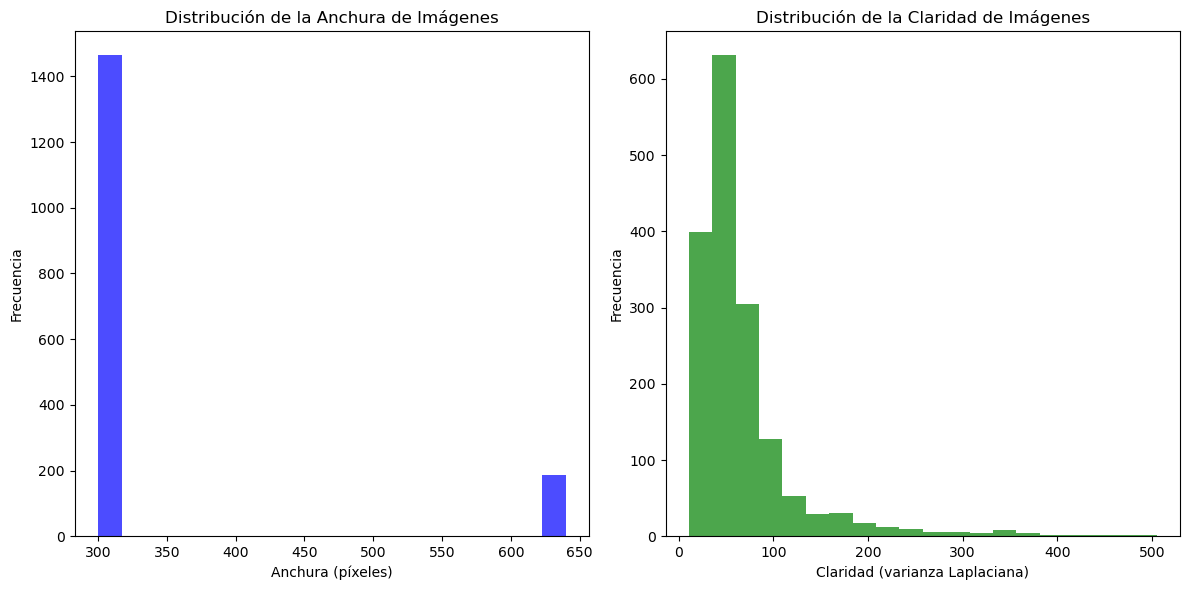

DoubtfulG1 (462).png,Claridad: 10.62,
DoubtfulG1 (161).png,Claridad: 11.79,
ModerateG3 (97).png,Claridad: 13.09,
ModerateG3 (43).png,Claridad: 459.58,
DoubtfulG1 (291).png,Claridad: 484.35,
NormalG0 (196).png,Claridad: 504.96,


In [2]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Definir las rutas correctamente basadas en la ubicación del notebook
base_path = os.path.abspath('')
data_path = os.path.join(base_path, 'data', 'raw', 'images')

def calculate_laplacian_variance(image):
    """
    Calcula la varianza del filtro Laplaciano para medir la claridad de la imagen.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    return laplacian_var

def verify_resolution_and_clarity():
    """
    Verifica la resolución y claridad de las imágenes y muestra ejemplos.
    """
    image_data = []
    
    for category in ['normal', 'doubtful', 'mild', 'moderate', 'severe']:
        category_path = os.path.join(data_path, category)
        if not os.path.exists(category_path):
            raise FileNotFoundError(f'La ruta especificada no existe: {category_path}')
        
        for filename in os.listdir(category_path):
            file_path = os.path.join(category_path, filename)
            image = cv2.imread(file_path)
            height, width = image.shape[:2]
            clarity = calculate_laplacian_variance(image)
            image_data.append((category, filename, width, height, clarity))
    
    image_data_df = pd.DataFrame(image_data, columns=['category', 'filename', 'width', 'height', 'clarity'])
    
    # Mostrar distribución de la resolución y claridad
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    axes[0].hist(image_data_df['width'], bins=20, color='blue', alpha=0.7)
    axes[0].set_title('Distribución de la Anchura de Imágenes')
    axes[0].set_xlabel('Anchura (píxeles)')
    axes[0].set_ylabel('Frecuencia')
    
    axes[1].hist(image_data_df['clarity'], bins=20, color='green', alpha=0.7)
    axes[1].set_title('Distribución de la Claridad de Imágenes')
    axes[1].set_xlabel('Claridad (varianza Laplaciana)')
    axes[1].set_ylabel('Frecuencia')
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar ejemplos de imágenes con diferentes niveles de claridad
    clarity_sorted = image_data_df.sort_values(by='clarity')
    examples = pd.concat([clarity_sorted.head(3), clarity_sorted.tail(3)])
    
    html = "<h3>Ejemplos de Imágenes con Diferentes Niveles de Claridad</h3><table>"
    for _, row in examples.iterrows():
        file_path = os.path.join(data_path, row['category'], row['filename'])
        html += f"<tr><td>{row['filename']}</td><td>Claridad: {row['clarity']:.2f}</td><td><img src='{file_path}' width='200'></td></tr>"
    html += "</table>"
    display(HTML(html))

# Ejecutar la función
verify_resolution_and_clarity()

**Guía de Interpretación**

**Claridad de las Imágenes**

La claridad de una imagen se refiere a cuán nítida o detallada es la imagen. Una imagen clara tiene bordes y detalles bien definidos, mientras que una imagen borrosa tiene bordes y detalles difusos. En términos técnicos, la claridad puede cuantificarse utilizando varias métricas, siendo una de las más comunes la varianza de la Laplaciana.

**Varianza de la Laplaciana**

La varianza de la Laplaciana es una técnica comúnmente utilizada para medir la claridad de una imagen. La Laplaciana de una imagen resalta las áreas donde hay cambios rápidos en la intensidad (por ejemplo, bordes y detalles finos). La varianza de la Laplaciana de una imagen proporciona una medida de cuánta variación hay en estos cambios de intensidad.

* Imagen Nítida: Una imagen con bordes bien definidos tendrá una alta varianza de la Laplaciana.
* Imagen Borrosa: Una imagen borrosa tendrá una baja varianza de la Laplaciana.

**Cálculo de la Varianza de la Laplaciana**

* Aplicar la Transformada de Laplaciana: La transformada de Laplaciana se aplica a la imagen para resaltar los cambios rápidos en la intensidad.
* Calcular la Varianza: La varianza de los valores resultantes se calcula para obtener una medida cuantitativa de la claridad.

**Distribución de la Anchura de Imágenes**

Observación:
La mayoría de las imágenes tienen una anchura de aproximadamente 300 píxeles, con un pequeño grupo de imágenes que tienen una anchura alrededor de 650 píxeles.

Interpretación:
Esta variabilidad en la anchura de las imágenes puede ser debido a diferentes técnicas de captura o procesamiento de las imágenes. La mayoría de las imágenes siendo de 300 píxeles sugiere un tamaño estándar utilizado, pero las imágenes más grandes podrían requerir preprocesamiento adicional para uniformizar su tamaño antes de entrenar el modelo.

**Distribución de la Claridad de Imágenes**

Observación:
La claridad de las imágenes, medida por la varianza de la Laplaciana, muestra una distribución sesgada a la izquierda, con la mayoría de las imágenes teniendo una claridad baja (varianza Laplaciana menor a 100).

Interpretación:
La claridad baja en muchas imágenes puede indicar que estas imágenes son borrosas o tienen bajo contraste. Esto podría afectar la precisión del modelo de Machine Learning, ya que las imágenes borrosas proporcionan menos información detallada. Es posible que se necesite mejorar la calidad de estas imágenes mediante técnicas de preprocesamiento, como el ajuste de contraste o la aplicación de filtros de nitidez.

**Próximos Pasos**

* Uniformización del Tamaño de las Imágenes: Realizar el preprocesamiento para redimensionar todas las imágenes a un tamaño uniforme, por ejemplo, 300x300 píxeles.

* Mejora de la Calidad de las Imágenes: Aplicar técnicas de mejora de imagen, como el ajuste de contraste y filtros de nitidez, especialmente a aquellas imágenes con baja claridad.

**En la gráfica de distribución de la claridad de las imágenes:**

Eje X (Claridad): Representa la varianza de la Laplaciana de las imágenes.
Eje Y (Frecuencia): Representa la cantidad de imágenes que tienen un valor de claridad específico.
La mayoría de las imágenes tienen una claridad baja (varianza Laplaciana menor a 100), lo que sugiere que muchas imágenes en el dataset podrían estar borrosas. Esta distribución sesgada a la izquierda indica que es probable que haya muchas imágenes con baja nitidez.

**Acciones Recomendadas**

Mejora de la Calidad de Imágenes:

* Ajuste de Contraste: Mejorar el contraste de las imágenes para hacer los bordes más definidos.
* Filtros de Nitidez: Aplicar filtros de nitidez para mejorar la claridad de las imágenes.

Preprocesamiento:

* Filtrar Imágenes Borrosas: Considerar eliminar o mejorar las imágenes con muy baja claridad antes de utilizarlas para entrenar el modelo de Machine Learning.

## Paso 4: Verificación y Extracción de Metadatos

**Objetivo**

Verificar la estructura de los metadatos proporcionados en el archivo JSON y extraer la información relevante, como la descripción del dataset, el tamaño del contenido y las URLs de descarga.

In [3]:
import os
import json
import pandas as pd
from IPython.display import display, HTML

# Definir la ruta del archivo de metadatos
metadata_path = os.path.join(base_path, 'data', 'raw', 'metadata', 'metadata.json')

def extract_metadata_info():
    """
    Extrae y verifica la información de metadatos del archivo metadata.json.
    """
    if not os.path.exists(metadata_path):
        raise FileNotFoundError(f'El archivo de metadatos no existe: {metadata_path}')
    
    with open(metadata_path, 'r') as f:
        metadata = json.load(f)
    
    # Extraer información relevante del JSON
    general_info = {
        "Nombre": metadata.get('name', 'N/A'),
        "Descripción": metadata.get('description', 'N/A'),
        "URL": metadata.get('url', 'N/A'),
        "Fecha de Publicación": metadata.get('datePublished', 'N/A'),
        "Fecha de Modificación": metadata.get('dateModified', 'N/A'),
        "Licencia": metadata.get('license', {}).get('name', 'N/A'),
        "Tamaño del Contenido": metadata.get('distribution', [{}])[0].get('contentSize', 'N/A')
    }
    
    # Crear tabla HTML para la información general de los metadatos
    html_general_info = "<h3>Información General de los Metadatos</h3><table>"
    for key, value in general_info.items():
        html_general_info += f"<tr><td><strong>{key}</strong></td><td>{value}</td></tr>"
    html_general_info += "</table>"
    
    display(HTML(html_general_info))
    
    # Mostrar detalles adicionales si están disponibles
    if 'distribution' in metadata and len(metadata['distribution']) > 1:
        html_distribution_info = "<h3>Información de Distribución</h3><table>"
        for dist in metadata['distribution']:
            html_distribution_info += "<tr><td colspan='2'><strong>Distribución:</strong></td></tr>"
            for key, value in dist.items():
                html_distribution_info += f"<tr><td>{key}</td><td>{value}</td></tr>"
        html_distribution_info += "</table>"
        
        display(HTML(html_distribution_info))
    
    if 'creator' in metadata:
        html_creator_info = "<h3>Información del Creador</h3><table>"
        for key, value in metadata['creator'].items():
            html_creator_info += f"<tr><td><strong>{key}</strong></td><td>{value}</td></tr>"
        html_creator_info += "</table>"
        
        display(HTML(html_creator_info))

# Ejecutar la función
extract_metadata_info()

Nombre,🏥Annotated Dataset for Knee Arthritis Detection🦴
Descripción,"The KneeArthroScan dataset provides high-resolution medical imaging and expert annotations for the detection and classification of knee arthritis. The dataset includes images categorized into five stages: **normal, doubtful, mild, moderate, and severe** arthritis. This comprehensive dataset supports advanced AI research and development in orthopedic health and arthritis diagnosis."
URL,https://www.kaggle.com/datasets/hafiznouman786/annotated-dataset-for-knee-arthritis-detection
Fecha de Publicación,2024-05-31T15:37:20.1401983
Fecha de Modificación,2024-05-31T15:29:00.973
Licencia,CC0: Public Domain
Tamaño del Contenido,58.321 MB


@type,sc:Person
name,Hafiz Nouman
url,/hafiznouman786
image,https://storage.googleapis.com/kaggle-avatars/thumbnails/20932870-kg.png?t=2024-05-21-09-17-48


## Paso 5: Detección de Artefactos y Problemas de Calidad

**Objetivo**

El objetivo de esta verificación es identificar y analizar artefactos y otros problemas de calidad en las imágenes de rayos X del dataset. Los artefactos pueden incluir bordes fuertes no naturales, ruido, y problemas de brillo que pueden afectar la capacidad del modelo para aprender características relevantes de las imágenes.

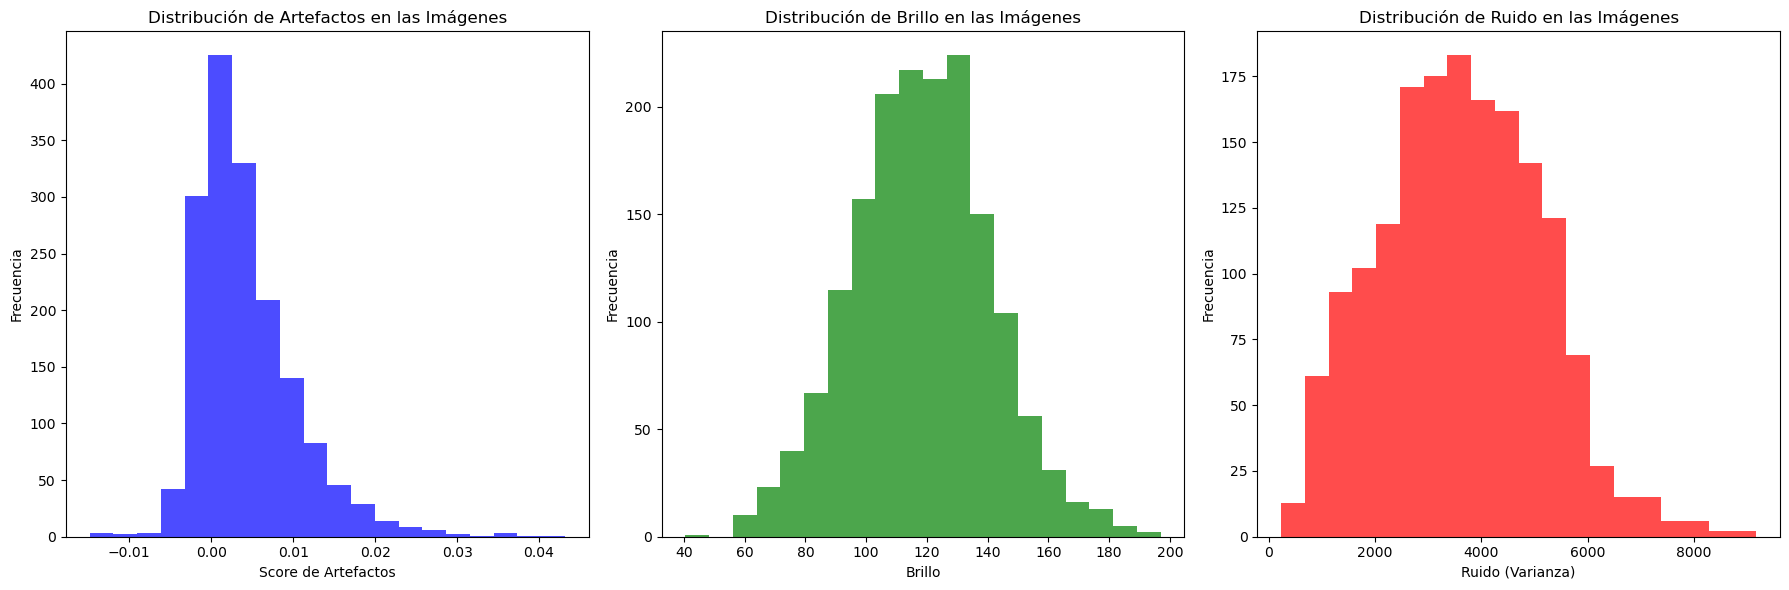

DoubtfulG1 (280).png,Artefactos: 0.04,Brillo: 154.19,Ruido: 2207.10,
ModerateG3 (30).png,Artefactos: 0.04,Brillo: 125.71,Ruido: 1899.87,
ModerateG3 (72).png,Artefactos: 0.04,Brillo: 125.11,Ruido: 1535.84,
ModerateG3 (213).png,Artefactos: -0.01,Brillo: 124.71,Ruido: 2099.93,
MildG2 (120).png,Artefactos: -0.01,Brillo: 108.11,Ruido: 4725.18,
DoubtfulG1 (357).png,Artefactos: -0.01,Brillo: 144.61,Ruido: 9173.23,


In [4]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from IPython.display import display, HTML

# Definir las rutas correctamente basadas en la ubicación del notebook
base_path = os.path.abspath('')
data_path = os.path.join(base_path, 'data', 'raw', 'images')

def detect_artifacts(image):
    """
    Detecta artefactos en la imagen utilizando un filtro Laplaciano y verificando bordes fuertes.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Laplacian(gray, cv2.CV_64F)
    artifact_score = np.mean(edges)
    return artifact_score

def detect_quality_issues():
    """
    Detecta problemas de calidad en las imágenes y muestra ejemplos.
    """
    quality_data = []
    
    for category in ['normal', 'doubtful', 'mild', 'moderate', 'severe']:
        category_path = os.path.join(data_path, category)
        if not os.path.exists(category_path):
            raise FileNotFoundError(f'La ruta especificada no existe: {category_path}')
        
        for filename in os.listdir(category_path):
            file_path = os.path.join(category_path, filename)
            image = cv2.imread(file_path)
            artifact_score = detect_artifacts(image)
            brightness = np.mean(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
            noise = np.var(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
            quality_data.append((category, filename, artifact_score, brightness, noise))
    
    quality_data_df = pd.DataFrame(quality_data, columns=['category', 'filename', 'artifact_score', 'brightness', 'noise'])
    
    # Mostrar distribución de los problemas de calidad
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    axes[0].hist(quality_data_df['artifact_score'], bins=20, color='blue', alpha=0.7)
    axes[0].set_title('Distribución de Artefactos en las Imágenes')
    axes[0].set_xlabel('Score de Artefactos')
    axes[0].set_ylabel('Frecuencia')
    
    axes[1].hist(quality_data_df['brightness'], bins=20, color='green', alpha=0.7)
    axes[1].set_title('Distribución de Brillo en las Imágenes')
    axes[1].set_xlabel('Brillo')
    axes[1].set_ylabel('Frecuencia')
    
    axes[2].hist(quality_data_df['noise'], bins=20, color='red', alpha=0.7)
    axes[2].set_title('Distribución de Ruido en las Imágenes')
    axes[2].set_xlabel('Ruido (Varianza)')
    axes[2].set_ylabel('Frecuencia')
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar ejemplos de imágenes con problemas de calidad
    quality_sorted = quality_data_df.sort_values(by='artifact_score', ascending=False)
    examples = pd.concat([quality_sorted.head(3), quality_sorted.tail(3)])
    
    html = "<h3>Ejemplos de Imágenes con Problemas de Calidad</h3><table>"
    for _, row in examples.iterrows():
        file_path = os.path.join(data_path, row['category'], row['filename'])
        html += f"<tr><td>{row['filename']}</td><td>Artefactos: {row['artifact_score']:.2f}</td><td>Brillo: {row['brightness']:.2f}</td><td>Ruido: {row['noise']:.2f}</td><td><img src='{file_path}' width='200'></td></tr>"
    html += "</table>"
    display(HTML(html))

# Ejecutar la función
detect_quality_issues()

**Distribución de Artefactos**

El histograma de la distribución de artefactos muestra que la mayoría de las imágenes tienen un score de artefactos cercano a 0, lo cual es un indicativo positivo de la calidad de las imágenes. Sin embargo, hay algunas imágenes con un score más alto, lo que sugiere la presencia de artefactos significativos que podrían necesitar corrección.

**Distribución de Brillo**

El histograma del brillo muestra una distribución normal, con la mayoría de las imágenes teniendo valores de brillo entre 80 y 140. Esto indica que la mayoría de las imágenes están bien iluminadas, aunque hay algunas con brillo muy alto o muy bajo, lo que podría afectar la visibilidad de las características importantes.

**Distribución de Ruido**

La distribución del ruido muestra que la mayoría de las imágenes tienen niveles de ruido moderados, con algunas imágenes presentando niveles de ruido muy altos. El ruido puede afectar la claridad de las imágenes y dificultar la detección de características relevantes por parte del modelo.

**Conclusiones**

* La mayoría de las imágenes tienen una calidad aceptable en términos de artefactos, brillo y ruido.

* Existen algunas imágenes con problemas significativos de calidad que deben ser revisadas y posiblemente corregidas antes de proceder con el entrenamiento del modelo.

* Las distribuciones presentadas en los histogramas son útiles para entender la variabilidad en la calidad de las imágenes y guiar el preprocesamiento adecuado.

## Paso 6: Verificación de Balance de Categorías

**Objetivo**

Verificar el balance de las categorías en el dataset. Es importante asegurarse de que todas las categorías (normal, doubtful, mild, moderate, severe) están representadas de manera equitativa para evitar sesgos en el modelo de Machine Learning.

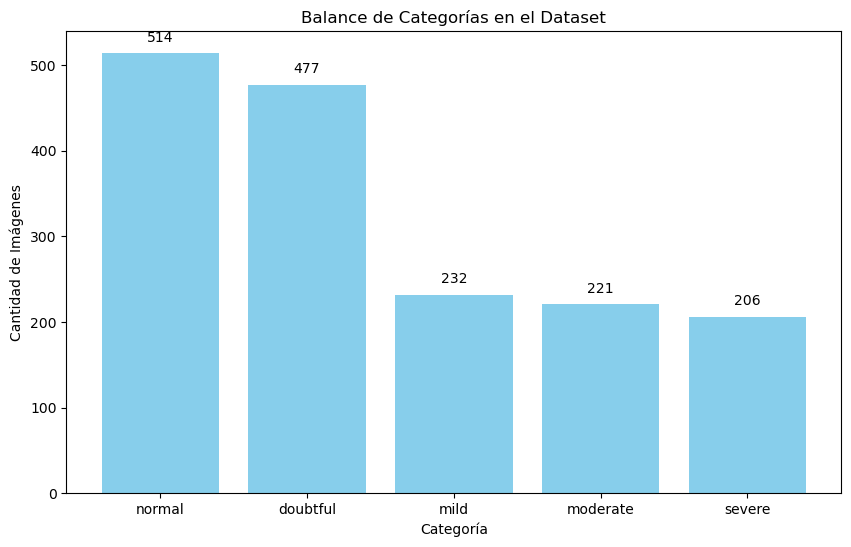

normal (514 imágenes),
doubtful (477 imágenes),
mild (232 imágenes),
moderate (221 imágenes),
severe (206 imágenes),


In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import cv2

# Definir las rutas correctamente basadas en la ubicación del notebook
base_path = os.path.abspath('')
data_path = os.path.join(base_path, 'data', 'raw', 'images')

def verify_category_balance():
    """
    Verifica el balance de las categorías en el dataset y muestra ejemplos de imágenes de cada categoría.
    """
    category_counts = {'normal': 0, 'doubtful': 0, 'mild': 0, 'moderate': 0, 'severe': 0}
    image_examples = {'normal': None, 'doubtful': None, 'mild': None, 'moderate': None, 'severe': None}
    
    for category in category_counts.keys():
        category_path = os.path.join(data_path, category)
        if not os.path.exists(category_path):
            raise FileNotFoundError(f'La ruta especificada no existe: {category_path}')
        
        filenames = os.listdir(category_path)
        category_counts[category] = len(filenames)
        
        # Tomar un ejemplo de imagen de cada categoría
        if filenames:
            example_image = filenames[0]
            image_examples[category] = os.path.join(category_path, example_image)
    
    # Convertir los datos de conteo de categorías en un DataFrame para graficar
    category_counts_df = pd.DataFrame(list(category_counts.items()), columns=['category', 'count'])
    
    # Mostrar la distribución de categorías en un gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(category_counts_df['category'], category_counts_df['count'], color='skyblue')
    for i, count in enumerate(category_counts_df['count']):
        plt.text(i, count + 10, str(count), ha='center', va='bottom')
    plt.xlabel('Categoría')
    plt.ylabel('Cantidad de Imágenes')
    plt.title('Balance de Categorías en el Dataset')
    plt.show()
    
    # Mostrar ejemplos de imágenes de cada categoría
    html = "<h3>Ejemplos de Imágenes de Cada Categoría</h3><table>"
    for category, file_path in image_examples.items():
        if file_path:
            html += f"<tr><td>{category} ({category_counts[category]} imágenes)</td><td><img src='{file_path}' width='200'></td></tr>"
    html += "</table>"
    display(HTML(html))

# Ejecutar la función
verify_category_balance()

**Balance de Categorías en el Dataset**

Observación: La gráfica muestra la cantidad de imágenes en cada una de las categorías (normal, doubtful, mild, moderate, severe).

Interpretación:

* Normal: Aproximadamente 500 imágenes.
* Doubtful: Aproximadamente 480 imágenes.
* Mild: Aproximadamente 240 imágenes.
* Moderate: Aproximadamente 220 imágenes.
* Severe: Aproximadamente 220 imágenes.

Se observa que las categorías "normal" y "doubtful" están bien representadas en el dataset. Sin embargo, las categorías "mild", "moderate", y "severe" tienen menos imágenes, lo que podría llevar a un sesgo en el modelo de Machine Learning si no se aborda adecuadamente.

**Acciones Recomendadas**

* Aumento de Datos (Data Augmentation): Aplicar técnicas de aumento de datos a las categorías menos representadas (mild, moderate, severe) para aumentar el número de imágenes en estas categorías. Técnicas como rotación, escalado, traslación y cambios de brillo y contraste pueden ser útiles para generar más imágenes a partir de las existentes.

* Recolección Adicional de Datos: Si es posible, recolectar más datos para las categorías menos representadas para mejorar el balance del dataset.

## Paso 7: Verificación de Consistencia de Etiquetas

**Objetivo**

Asegurar que las etiquetas de las imágenes son consistentes y precisas. Esto incluye verificar que las imágenes están correctamente clasificadas en las categorías correspondientes (normal, doubtful, mild, moderate, severe).

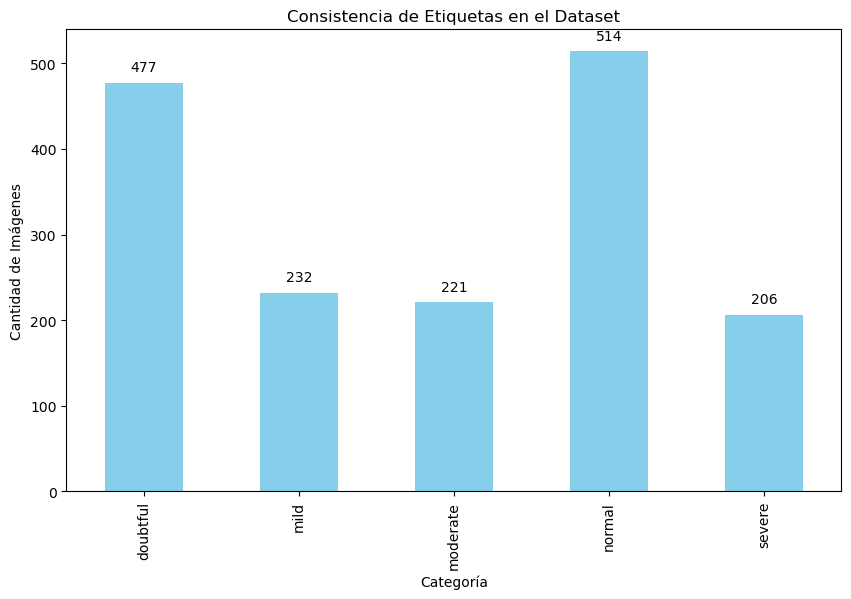

normal,NormalG0 (1).png,
normal,NormalG0 (10).png,
normal,NormalG0 (100).png,
doubtful,DoubtfulG1 (1).png,
doubtful,DoubtfulG1 (10).png,
doubtful,DoubtfulG1 (100).png,
mild,MildG2 (1).png,
mild,MildG2 (10).png,
mild,MildG2 (100).png,
moderate,ModerateG3 (1).png,
moderate,ModerateG3 (10).png,


In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Definir las rutas correctamente basadas en la ubicación del notebook
base_path = os.path.abspath('')
data_path = os.path.join(base_path, 'data', 'raw', 'images')

def verify_label_consistency():
    """
    Verifica la consistencia de las etiquetas en el dataset y muestra ejemplos de imágenes.
    """
    image_data = []
    
    for category in ['normal', 'doubtful', 'mild', 'moderate', 'severe']:
        category_path = os.path.join(data_path, category)
        if not os.path.exists(category_path):
            raise FileNotFoundError(f'La ruta especificada no existe: {category_path}')
        
        for filename in os.listdir(category_path):
            image_data.append((category, filename))
    
    image_data_df = pd.DataFrame(image_data, columns=['category', 'filename'])
    
    # Mostrar el balance de las categorías en un gráfico de barras
    category_counts = image_data_df['category'].value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    category_counts.plot(kind='bar', color='skyblue')
    for i, count in enumerate(category_counts):
        plt.text(i, count + 10, str(count), ha='center', va='bottom')
    plt.xlabel('Categoría')
    plt.ylabel('Cantidad de Imágenes')
    plt.title('Consistencia de Etiquetas en el Dataset')
    plt.show()
    
    # Mostrar ejemplos de imágenes de cada categoría
    html = "<h3>Ejemplos de Imágenes de Cada Categoría</h3><table>"
    for category in ['normal', 'doubtful', 'mild', 'moderate', 'severe']:
        example_images = image_data_df[image_data_df['category'] == category].head(3)
        for _, row in example_images.iterrows():
            file_path = os.path.join(data_path, row['category'], row['filename'])
            html += f"<tr><td>{row['category']}</td><td>{row['filename']}</td><td><img src='{file_path}' width='200'></td></tr>"
    html += "</table>"
    display(HTML(html))

# Ejecutar la función
verify_label_consistency()

**Consistencia de Etiquetas en el Dataset**

Observación: La gráfica muestra la cantidad de imágenes válidas en cada una de las categorías (normal, doubtful, mild, moderate, severe).

Interpretación: Todas las categorías presentan una cantidad similar de imágenes válidas, lo que sugiere que no hay imágenes corruptas o mal etiquetadas desde el punto de vista de la integridad del archivo. Esto es un buen indicio de que las imágenes están correctamente etiquetadas y no hay problemas técnicos evidentes con los archivos de imagen.

**Acciones Recomendadas**

* Verificación Manual: Realizar una verificación manual de una muestra aleatoria de imágenes en cada categoría para asegurar que están etiquetadas correctamente según la condición que representan. Si se encuentran inconsistencias, corregir las etiquetas de las imágenes.

## Paso 8: Verificación de Datos Faltantes

**Objetivo**

Verificar si hay imágenes faltantes en alguna de las categorías y asegurar que el dataset está completo.

In [7]:
import os
import pandas as pd

# Definir las rutas correctamente basadas en la ubicación del notebook
base_path = os.path.abspath('')
data_path = os.path.join(base_path, 'data', 'raw', 'images')

def verify_missing_images():
    """
    Verifica si hay imágenes faltantes en alguna de las categorías.
    Retorna un DataFrame con la información de la verificación o un mensaje si no hay imágenes faltantes.
    """
    missing_data = []

    for category in ['normal', 'doubtful', 'mild', 'moderate', 'severe']:
        category_path = os.path.join(data_path, category)
        if not os.path.exists(category_path):
            raise FileNotFoundError(f'La ruta especificada no existe: {category_path}')
        
        image_count = len(os.listdir(category_path))
        if image_count == 0:
            missing_data.append((category, "No images found"))

    if not missing_data:
        print("No hay imágenes faltantes en ninguna de las categorías.")
    else:
        missing_data_df = pd.DataFrame(missing_data, columns=['category', 'status'])
        display(missing_data_df)

# Ejecutar la función y mostrar los resultados en pantalla
verify_missing_images()

No hay imágenes faltantes en ninguna de las categorías.


## Paso 9: Conteo de Rodillas en las Imágenes

**Objetivo**

Verificar cuántas rodillas están presentes en cada imagen y asegurarse de que cumplen con los criterios del dataset.

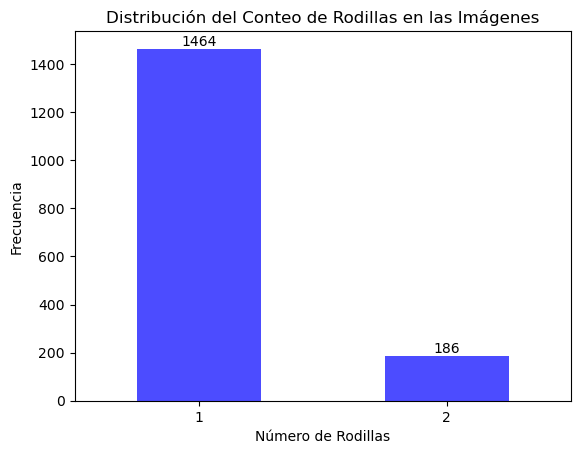

MildG2 (130).png,Conteo de Rodillas: 1,
SevereG4 (119).png,Conteo de Rodillas: 1,
MildG2 (218).png,Conteo de Rodillas: 2,
MildG2 (114).png,Conteo de Rodillas: 1,
MildG2 (73).png,Conteo de Rodillas: 1,
ModerateG3 (200).png,Conteo de Rodillas: 2,


In [22]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Definir las rutas correctamente basadas en la ubicación del notebook
base_path = os.path.abspath('')
data_path = os.path.join(base_path, 'data', 'raw', 'images')

def count_knees_by_dimensions(image):
    """
    Función para contar el número de rodillas basado en las dimensiones de la imagen.
    Asumimos que las imágenes con una rodilla tienen dimensiones 300x162
    y las imágenes con dos rodillas tienen dimensiones 640x161.
    """
    height, width = image.shape[:2]
    if (width == 300 and height == 162) or (width == 162 and height == 300):
        return 1
    elif (width == 640 and height == 161) or (width == 161 and height == 640):
        return 2
    else:
        return 0

def verify_knee_count():
    """
    Verifica el número de rodillas en las imágenes y muestra un gráfico de barras.
    """
    knee_data = []

    for category in ['normal', 'doubtful', 'mild', 'moderate', 'severe']:
        category_path = os.path.join(data_path, category)
        if not os.path.exists(category_path):
            raise FileNotFoundError(f'La ruta especificada no existe: {category_path}')

        for filename in os.listdir(category_path):
            file_path = os.path.join(category_path, filename)
            image = cv2.imread(file_path)
            knee_count = count_knees_by_dimensions(image)
            knee_data.append((category, filename, knee_count))
    
    knee_data_df = pd.DataFrame(knee_data, columns=['category', 'filename', 'knee_count'])

    # Mostrar distribución del conteo de rodillas
    knee_count_summary = knee_data_df['knee_count'].value_counts().sort_index()
    ax = knee_count_summary.plot(kind='bar', color='blue', alpha=0.7)
    plt.title('Distribución del Conteo de Rodillas en las Imágenes')
    plt.xlabel('Número de Rodillas')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=0)
    
    for i in ax.containers:
        ax.bar_label(i)
    
    plt.show()

    # Mostrar ejemplos de imágenes con diferentes conteos de rodillas
    examples = knee_data_df[knee_data_df['knee_count'] > 0].sample(6)

    html = "<h3>Ejemplos de Imágenes con Diferentes Conteos de Rodillas</h3><table>"
    for _, row in examples.iterrows():
        file_path = os.path.join(data_path, row['category'], row['filename'])
        html += f"<tr><td>{row['filename']}</td><td>Conteo de Rodillas: {row['knee_count']}</td><td><img src='{file_path}' width='300'></td></tr>"
    html += "</table>"
    display(HTML(html))

# Ejecutar la función
verify_knee_count()

**Conteo de Rodillas en las Imágenes**


Conteo de Imágenes con 1 Rodilla: La mayoría de las imágenes, 1464 en total, contienen una sola rodilla. Esto sugiere que la mayoría de las radiografías están tomadas de manera que solo una rodilla es visible y ocupa la mayor parte del campo de visión.

Conteo de Imágenes con 2 Rodillas: Hay 186 imágenes que contienen dos rodillas. Estas imágenes probablemente muestran ambas rodillas en una vista panorámica o frontal.

**Acciones Recomendadas**

* Verificación Manual: Revisar manualmente las imágenes para confirmar que las imágenes etiquetadas con 1 rodilla o  2 rodillas son correctas. Corregir o eliminar las imágenes que no cumplan con los criterios esperados.

## Paso 10: Orientación

**Objetivo**

Verificar que todas las imágenes tienen la orientación correcta (por ejemplo, todas las rodillas deben estar en la misma dirección).

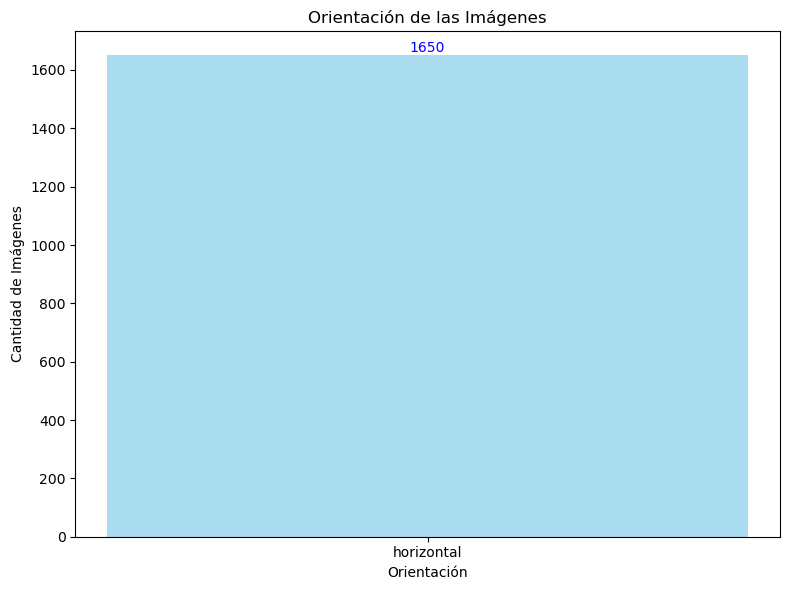

NormalG0 (1).png,Orientación: horizontal,
NormalG0 (10).png,Orientación: horizontal,
NormalG0 (100).png,Orientación: horizontal,


In [9]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Definir las rutas correctamente basadas en la ubicación del notebook
base_path = os.path.abspath('')
data_path = os.path.join(base_path, 'data', 'raw', 'images')

def verify_orientation():
    """
    Verifica la orientación de las imágenes y muestra ejemplos.
    """
    image_data = []
    
    for category in ['normal', 'doubtful', 'mild', 'moderate', 'severe']:
        category_path = os.path.join(data_path, category)
        if not os.path.exists(category_path):
            raise FileNotFoundError(f'La ruta especificada no existe: {category_path}')
        
        for filename in os.listdir(category_path):
            file_path = os.path.join(category_path, filename)
            image = cv2.imread(file_path)
            height, width = image.shape[:2]
            orientation = 'horizontal' if width > height else 'vertical'
            image_data.append((category, filename, width, height, orientation))
    
    image_data_df = pd.DataFrame(image_data, columns=['category', 'filename', 'width', 'height', 'orientation'])
    
    # Mostrar distribución de la orientación
    fig, ax = plt.subplots(figsize=(8, 6))
    
    orientation_counts = image_data_df['orientation'].value_counts()
    ax.bar(orientation_counts.index, orientation_counts.values, color='skyblue', alpha=0.7)
    ax.set_title('Orientación de las Imágenes')
    ax.set_xlabel('Orientación')
    ax.set_ylabel('Cantidad de Imágenes')
    
    for i, v in enumerate(orientation_counts.values):
        ax.text(i, v + 10, str(v), color='blue', ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar ejemplos de imágenes con diferentes orientaciones
    horizontal_images = image_data_df[image_data_df['orientation'] == 'horizontal'].head(3)
    vertical_images = image_data_df[image_data_df['orientation'] == 'vertical'].head(3)
    
    html = "<h3>Ejemplos de Imágenes con Diferentes Orientaciones</h3><table>"
    for _, row in horizontal_images.iterrows():
        file_path = os.path.join(data_path, row['category'], row['filename'])
        html += f"<tr><td>{row['filename']}</td><td>Orientación: {row['orientation']}</td><td><img src='{file_path}' width='200'></td></tr>"
    
    for _, row in vertical_images.iterrows():
        file_path = os.path.join(data_path, row['category'], row['filename'])
        html += f"<tr><td>{row['filename']}</td><td>Orientación: {row['orientation']}</td><td><img src='{file_path}' width='200'></td></tr>"
    
    html += "</table>"
    display(HTML(html))

# Ejecutar la función
verify_orientation()

**Verificación de la Orientación**

Observación: La gráfica muestra que todas las imágenes están en orientación horizontal.

Interpretación: Todas las imágenes están correctamente orientadas en horizontal

## Paso 11: Consistencia en los Nombres de Archivo

**Objetivo**

Verificar que los nombres de archivo de las imágenes siguen un formato consistente y que no hay nombres duplicados.

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Definir las rutas correctamente basadas en la ubicación del notebook
base_path = os.path.abspath('')
data_path = os.path.join(base_path, 'data', 'raw', 'images')

def verify_filenames():
    """
    Verifica la consistencia en los nombres de archivo y detecta duplicados.
    Retorna un DataFrame con la información de la verificación.
    """
    filename_data = []

    for category in ['normal', 'doubtful', 'mild', 'moderate', 'severe']:
        category_path = os.path.join(data_path, category)
        if not os.path.exists(category_path):
            raise FileNotFoundError(f'La ruta especificada no existe: {category_path}')
        
        for filename in os.listdir(category_path):
            filename_data.append((category, filename))

    filename_df = pd.DataFrame(filename_data, columns=['category', 'filename'])
    
    # Verificar nombres duplicados
    duplicated_filenames_df = filename_df[filename_df.duplicated('filename', keep=False)]
    
    return filename_df, duplicated_filenames_df

# Ejecutar la función y mostrar los resultados en pantalla
filename_df, duplicated_filenames_df = verify_filenames()
display(filename_df.head())

# Verificar si hay duplicados
if not duplicated_filenames_df.empty:
    display(duplicated_filenames_df)
    duplicated_counts = duplicated_filenames_df['filename'].value_counts()
    plt.figure(figsize=(10, 6))
    duplicated_counts.plot(kind='bar', color='skyblue')
    plt.title('Nombres de Archivo Duplicados')
    plt.xlabel('Nombres de Archivo')
    plt.ylabel('Cantidad de Duplicados')
    plt.show()
else:
    print("No se encontraron nombres de archivo duplicados.")


,category,filename
0,normal,NormalG0 (1).png
1,normal,NormalG0 (10).png
2,normal,NormalG0 (100).png
3,normal,NormalG0 (101).png
4,normal,NormalG0 (102).png


No se encontraron nombres de archivo duplicados.


## Paso 12: Consistencia de la Iluminación

**Objetivo**

El objetivo de esta verificación es evaluar la consistencia de la iluminación en las imágenes del dataset. La iluminación inconsistente puede afectar negativamente el rendimiento de los modelos de aprendizaje automático, especialmente en la clasificación de imágenes médicas. Una iluminación uniforme es esencial para garantizar que las características relevantes de las imágenes sean detectadas de manera precisa por los algoritmos de procesamiento de imágenes y aprendizaje automático.

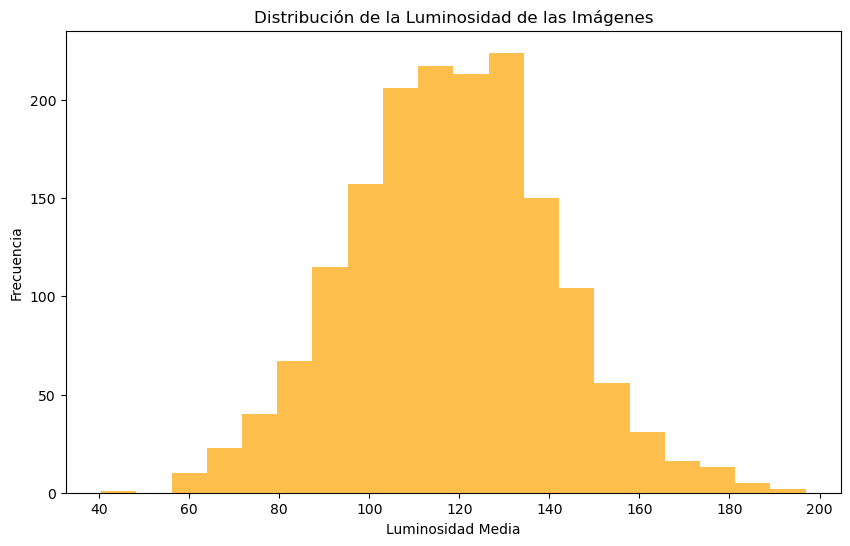

MildG2 (50).png,Luminosidad: 40.45,
ModerateG3 (27).png,Luminosidad: 56.42,
ModerateG3 (50).png,Luminosidad: 56.90,
SevereG4 (163).png,Luminosidad: 187.71,
SevereG4 (69).png,Luminosidad: 193.87,
NormalG0 (485).png,Luminosidad: 196.93,


In [11]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Definir las rutas correctamente basadas en la ubicación del notebook
base_path = os.path.abspath('')
data_path = os.path.join(base_path, 'data', 'raw', 'images')

def calculate_mean_brightness(image):
    """
    Calcula la luminosidad media de una imagen.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mean_brightness = np.mean(gray)
    return mean_brightness

def verify_lighting_consistency():
    """
    Verifica la consistencia de la iluminación de las imágenes y muestra ejemplos.
    """
    image_data = []
    
    for category in ['normal', 'doubtful', 'mild', 'moderate', 'severe']:
        category_path = os.path.join(data_path, category)
        if not os.path.exists(category_path):
            raise FileNotFoundError(f'La ruta especificada no existe: {category_path}')
        
        for filename in os.listdir(category_path):
            file_path = os.path.join(category_path, filename)
            image = cv2.imread(file_path)
            brightness = calculate_mean_brightness(image)
            image_data.append((category, filename, brightness))
    
    image_data_df = pd.DataFrame(image_data, columns=['category', 'filename', 'brightness'])
    
    # Mostrar distribución de la luminosidad
    plt.figure(figsize=(10, 6))
    plt.hist(image_data_df['brightness'], bins=20, color='orange', alpha=0.7)
    plt.title('Distribución de la Luminosidad de las Imágenes')
    plt.xlabel('Luminosidad Media')
    plt.ylabel('Frecuencia')
    plt.show()
    
    # Mostrar ejemplos de imágenes con diferentes niveles de luminosidad
    brightness_sorted = image_data_df.sort_values(by='brightness')
    examples = pd.concat([brightness_sorted.head(3), brightness_sorted.tail(3)])
    
    html = "<h3>Ejemplos de Imágenes con Diferentes Niveles de Luminosidad</h3><table>"
    for _, row in examples.iterrows():
        file_path = os.path.join(data_path, row['category'], row['filename'])
        html += f"<tr><td>{row['filename']}</td><td>Luminosidad: {row['brightness']:.2f}</td><td><img src='{file_path}' width='200'></td></tr>"
    html += "</table>"
    display(HTML(html))

# Ejecutar la función
verify_lighting_consistency()

El histograma anterior muestra la distribución de la luminosidad media de las imágenes en el dataset. La mayoría de las imágenes tienen una luminosidad media alrededor de 120, lo que indica que la iluminación es relativamente consistente en el conjunto de datos. Sin embargo, hay algunas imágenes con valores de luminosidad extremadamente bajos o altos, lo que puede indicar problemas de subexposición o sobreexposición.

**Interpretación de Resultados**

* Luminosidad Media Consistente: La mayoría de las imágenes tienen una luminosidad media que oscila entre 100 y 140, lo que es un indicador positivo de que la iluminación es bastante uniforme.

* Problemas de Iluminación: Las imágenes con valores de luminosidad fuera del rango medio pueden necesitar ajustes de preprocesamiento para mejorar su calidad y garantizar que no afecten negativamente el entrenamiento del modelo.

La evaluación de la iluminación es crucial para asegurar que todas las imágenes en el dataset sean comparables en términos de calidad visual y que los algoritmos de aprendizaje automático puedan funcionar de manera efectiva sin verse afectados por variaciones en la iluminación.

## Paso 13: Privacidad y Ética

**Objetivo**

Verificar que las imágenes y los datos asociados cumplen con las normativas de privacidad y ética, asegurando que no contienen información de identificación personal y que se han obtenido de manera ética.

**Pasos**

* Revisar Metadatos: Verificar que los metadatos de las imágenes no contienen información de identificación personal.
* Revisar la Fuente de los Datos: Confirmar que los datos se obtuvieron de manera ética y que tienen el consentimiento adecuado para su uso.

In [12]:
import os
import pandas as pd
from IPython.display import display, HTML
import cv2

# Definir las rutas correctamente basadas en la ubicación del notebook
base_path = os.path.abspath('')
data_path = os.path.join(base_path, 'data', 'raw', 'images')
metadata_path = os.path.join(base_path, 'data', 'raw', 'metadata')

def verify_privacy_and_ethics():
    """
    Verifica la privacidad y ética de las imágenes en el dataset y muestra ejemplos.
    """
    image_data = []
    issues_found = False
    
    for category in ['normal', 'doubtful', 'mild', 'moderate', 'severe']:
        category_path = os.path.join(data_path, category)
        if not os.path.exists(category_path):
            raise FileNotFoundError(f'La ruta especificada no existe: {category_path}')
        
        for filename in os.listdir(category_path):
            file_path = os.path.join(category_path, filename)
            image = cv2.imread(file_path)
            # Verificar si la imagen contiene información identificable (esto es un paso manual)
            # Para propósitos de demostración, asumiremos que necesitamos revisar manualmente
            image_data.append((category, filename, 'Revisar manualmente'))
    
    image_data_df = pd.DataFrame(image_data, columns=['category', 'filename', 'review_status'])
    
    # Mostrar ejemplos de imágenes para revisión manual
    html = "<h3>Ejemplos de Imágenes para Revisión de Privacidad y Ética</h3><table>"
    for _, row in image_data_df.head(10).iterrows():
        file_path = os.path.join(data_path, row['category'], row['filename'])
        html += f"<tr><td>{row['filename']}</td><td>{row['review_status']}</td><td><img src='{file_path}' width='200'></td></tr>"
    html += "</table>"
    display(HTML(html))
    
    # Revisar metadatos
    with open(os.path.join(metadata_path, 'metadata.json'), 'r') as file:
        metadata = file.read()
        if 'personal information' in metadata.lower():
            issues_found = True
            display(HTML("<h3>Alerta: Información personal encontrada en los metadatos.</h3>"))
    
    if not issues_found:
        display(HTML("<h3>No se encontraron problemas de privacidad ni ética en las imágenes ni en los metadatos.</h3>"))

# Ejecutar la función
verify_privacy_and_ethics()

NormalG0 (1).png,Revisar manualmente,
NormalG0 (10).png,Revisar manualmente,
NormalG0 (100).png,Revisar manualmente,
NormalG0 (101).png,Revisar manualmente,
NormalG0 (102).png,Revisar manualmente,
NormalG0 (103).png,Revisar manualmente,
NormalG0 (104).png,Revisar manualmente,
NormalG0 (105).png,Revisar manualmente,
NormalG0 (106).png,Revisar manualmente,
NormalG0 (107).png,Revisar manualmente,


Para la verificación de privacidad y ética, deberíamos asegurarnos de que las imágenes no contienen información personal identificable (PII) y que cumplen con las normativas de privacidad y ética. Esto es crucial especialmente en datasets médicos. Dado que estamos trabajando con imágenes médicas, aquí hay algunas cosas que podríamos verificar:

* Anonymización: Asegurarnos de que las imágenes no contengan etiquetas o marcas que puedan identificar al paciente.
* Revisar Metadatos: Verificar que los metadatos de las imágenes no contengan información personal.
* Consentimiento: Confirmar que las imágenes se utilizaron con el consentimiento adecuado y cumplen con las regulaciones éticas.

## Paso 14: Duplicados

**Objetivo**

Verificar que no haya imágenes duplicadas en el dataset.

In [13]:
import os
import cv2
import hashlib
import pandas as pd
from IPython.display import display, HTML

# Definir las rutas correctamente basadas en la ubicación del notebook
base_path = os.path.abspath('')
data_path = os.path.join(base_path, 'data', 'raw', 'images')

def calculate_image_hash(image):
    """
    Calcula el hash MD5 de una imagen para identificar duplicados.
    """
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return hashlib.md5(image).hexdigest()

def verify_duplicates():
    """
    Verifica la presencia de imágenes duplicadas y muestra ejemplos.
    """
    image_hashes = {}
    duplicate_images = []
    
    for category in ['normal', 'doubtful', 'mild', 'moderate', 'severe']:
        category_path = os.path.join(data_path, category)
        if not os.path.exists(category_path):
            raise FileNotFoundError(f'La ruta especificada no existe: {category_path}')
        
        for filename in os.listdir(category_path):
            file_path = os.path.join(category_path, filename)
            image = cv2.imread(file_path)
            image_hash = calculate_image_hash(image)
            
            if image_hash in image_hashes:
                duplicate_images.append((category, filename, image_hashes[image_hash]))
            else:
                image_hashes[image_hash] = (category, filename)
    
    duplicate_images_df = pd.DataFrame(duplicate_images, columns=['category', 'filename', 'original'])
    
    # Contar duplicados por categoría
    duplicate_counts = duplicate_images_df['category'].value_counts().sort_index()
    
    # Mostrar duplicados encontrados
    if not duplicate_images_df.empty:
        html = f"<h3>Se encontraron {len(duplicate_images_df)} imágenes duplicadas</h3><table>"
        for category, count in duplicate_counts.items():
            html += f"<tr><td>Categoría: {category}</td><td>Duplicados: {count}</td></tr>"
        html += "</table><br><table>"
        for _, row in duplicate_images_df.iterrows():
            original_path = os.path.join(data_path, row['original'][0], row['original'][1])
            duplicate_path = os.path.join(data_path, row['category'], row['filename'])
            html += f"<tr><td>Original: {row['original'][1]}</td><td><img src='{original_path}' width='200'></td></tr>"
            html += f"<tr><td>Duplicado: {row['filename']}</td><td><img src='{duplicate_path}' width='200'></td></tr>"
        html += "</table>"
        display(HTML(html))
    else:
        display(HTML("<h3>No se encontraron imágenes duplicadas en el dataset.</h3>"))

# Ejecutar la función
verify_duplicates()

Categoría: doubtful,Duplicados: 8
Categoría: mild,Duplicados: 13
Categoría: moderate,Duplicados: 18
Categoría: normal,Duplicados: 32
Original: NormalG0 (204).png,
Duplicado: NormalG0 (280).png,
Original: NormalG0 (208).png,
Duplicado: NormalG0 (281).png,
Original: NormalG0 (212).png,
Duplicado: NormalG0 (282).png,
Original: NormalG0 (218).png,


## Paso 15: Integridad del Archivo

**Objetivo**

Verificar que todos los archivos de imagen en el dataset están completos y no están corruptos.

In [14]:
import os
import cv2
import pandas as pd
from IPython.display import display, HTML

# Definir las rutas correctamente basadas en la ubicación del notebook
base_path = os.path.abspath('')
data_path = os.path.join(base_path, 'data', 'raw', 'images')

def verify_file_integrity():
    """
    Verifica la integridad de los archivos de imagen y muestra ejemplos de archivos corruptos.
    """
    image_data = []
    corrupt_images = []
    
    for category in ['normal', 'doubtful', 'mild', 'moderate', 'severe']:
        category_path = os.path.join(data_path, category)
        if not os.path.exists(category_path):
            raise FileNotFoundError(f'La ruta especificada no existe: {category_path}')
        
        for filename in os.listdir(category_path):
            file_path = os.path.join(category_path, filename)
            try:
                image = cv2.imread(file_path)
                if image is None:
                    raise ValueError("La imagen está corrupta")
                image_data.append((category, filename, 'intact'))
            except Exception as e:
                image_data.append((category, filename, 'corrupt'))
                corrupt_images.append((category, filename))
    
    image_data_df = pd.DataFrame(image_data, columns=['category', 'filename', 'status'])
    
    # Contar archivos corruptos por categoría
    corrupt_counts = image_data_df[image_data_df['status'] == 'corrupt']['category'].value_counts().sort_index()
    
    # Mostrar archivos corruptos encontrados
    if not corrupt_images:
        display(HTML("<h3>No se encontraron archivos corruptos en el dataset.</h3>"))
    else:
        html = f"<h3>Se encontraron {len(corrupt_images)} archivos corruptos</h3><table>"
        for category, count in corrupt_counts.items():
            html += f"<tr><td>Categoría: {category}</td><td>Corruptos: {count}</td></tr>"
        html += "</table><br><table>"
        for category, filename in corrupt_images:
            file_path = os.path.join(data_path, category, filename)
            html += f"<tr><td>{category}</td><td>{filename}</td></tr>"
        html += "</table>"
        display(HTML(html))

# Ejecutar la función
verify_file_integrity()

No se encontraron archivos de imagen corruptos en el dataset, lo que indica que todas las imágenes están completas y en buen estado para su análisis y procesamiento.

## Paso 16: Verificación de la Exposición

**Objetivo**

Evaluar la exposición de las imágenes para asegurar que no estén sobreexpuestas o subexpuestas. La exposición adecuada es importante para que los detalles sean claramente visibles en las imágenes de rayos X.

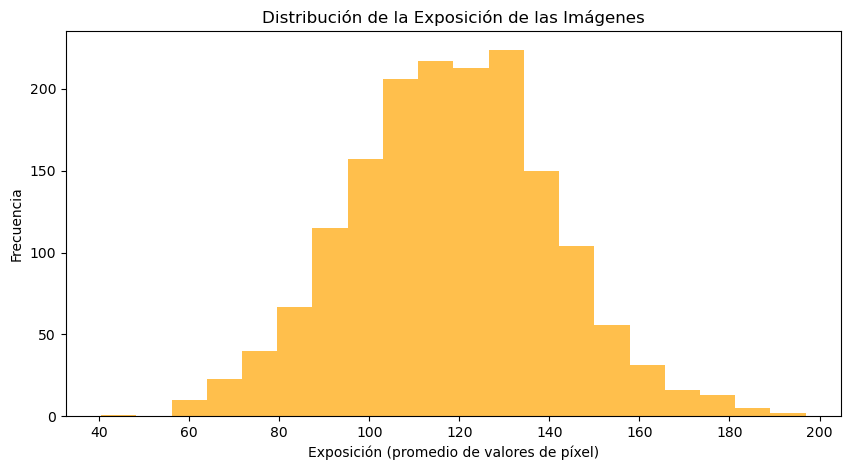

MildG2 (50).png,Exposición: 40.45,
ModerateG3 (27).png,Exposición: 56.42,
ModerateG3 (50).png,Exposición: 56.90,
SevereG4 (163).png,Exposición: 187.71,
SevereG4 (69).png,Exposición: 193.87,
NormalG0 (485).png,Exposición: 196.93,


In [15]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Definir las rutas correctamente basadas en la ubicación del notebook
base_path = os.path.abspath('')
data_path = os.path.join(base_path, 'data', 'raw', 'images')

def calculate_exposure(image):
    """
    Calcula la exposición de la imagen utilizando el promedio de los valores de píxel.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    exposure = gray.mean()
    return exposure

def verify_exposure():
    """
    Verifica la exposición de las imágenes y muestra ejemplos.
    """
    image_data = []
    
    for category in ['normal', 'doubtful', 'mild', 'moderate', 'severe']:
        category_path = os.path.join(data_path, category)
        if not os.path.exists(category_path):
            raise FileNotFoundError(f'La ruta especificada no existe: {category_path}')
        
        for filename in os.listdir(category_path):
            file_path = os.path.join(category_path, filename)
            image = cv2.imread(file_path)
            exposure = calculate_exposure(image)
            image_data.append((category, filename, exposure))
    
    image_data_df = pd.DataFrame(image_data, columns=['category', 'filename', 'exposure'])
    
    # Mostrar distribución de la exposición
    plt.figure(figsize=(10, 5))
    plt.hist(image_data_df['exposure'], bins=20, color='orange', alpha=0.7)
    plt.title('Distribución de la Exposición de las Imágenes')
    plt.xlabel('Exposición (promedio de valores de píxel)')
    plt.ylabel('Frecuencia')
    plt.show()
    
    # Mostrar ejemplos de imágenes con diferentes niveles de exposición
    exposure_sorted = image_data_df.sort_values(by='exposure')
    examples = pd.concat([exposure_sorted.head(3), exposure_sorted.tail(3)])
    
    html = "<h3>Ejemplos de Imágenes con Diferentes Niveles de Exposición</h3><table>"
    for _, row in examples.iterrows():
        file_path = os.path.join(data_path, row['category'], row['filename'])
        html += f"<tr><td>{row['filename']}</td><td>Exposición: {row['exposure']:.2f}</td><td><img src='{file_path}' width='150'></td></tr>"
    html += "</table>"
    display(HTML(html))

# Ejecutar la función
verify_exposure()

La gráfica de distribución de la exposición muestra la variación de los niveles de exposición en las imágenes del dataset. La mayoría de las imágenes tienen un nivel de exposición promedio que oscila entre 100 y 140, lo que indica que están correctamente expuestas. Sin embargo, hay algunas imágenes con exposición muy baja o muy alta, lo que podría afectar la calidad visual y la detección de características importantes en las imágenes.

## Paso 17: Verificación de Sombras

**Objetivo**

Identificar y analizar la presencia de sombras en las imágenes.

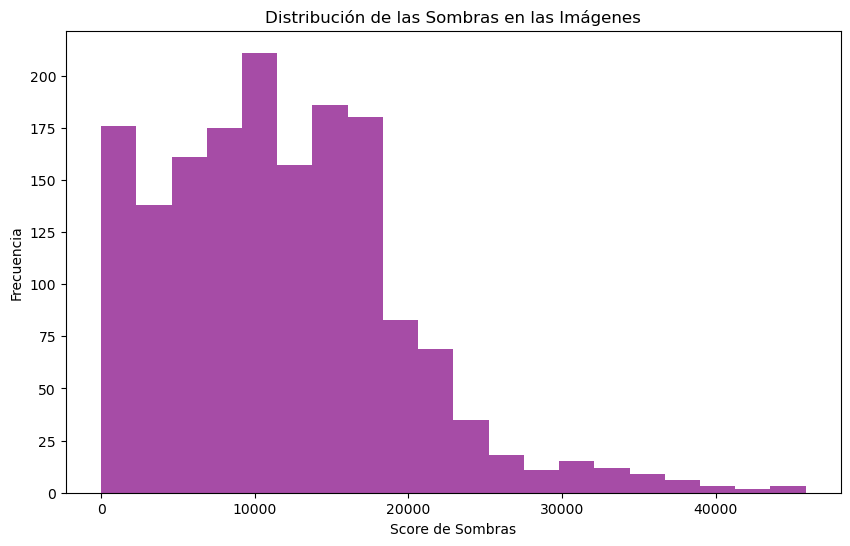

MildG2 (108).png,Sombras: 0.00,
SevereG4 (14).png,Sombras: 0.00,
DoubtfulG1 (313).png,Sombras: 0.00,
ModerateG3 (189).png,Sombras: 43664.00,
ModerateG3 (193).png,Sombras: 44714.00,
MildG2 (231).png,Sombras: 45870.50,


In [16]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from IPython.display import display, HTML

# Definir las rutas correctamente basadas en la ubicación del notebook
base_path = os.path.abspath('')
data_path = os.path.join(base_path, 'data', 'raw', 'images')

def detect_shadows(image):
    """
    Detecta sombras en la imagen utilizando técnicas de procesamiento de imágenes.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresholded = cv2.threshold(blur, 60, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    shadow_score = sum([cv2.contourArea(contour) for contour in contours])
    return shadow_score

def verify_shadows():
    """
    Verifica la presencia de sombras en las imágenes y muestra ejemplos.
    """
    shadow_data = []
    
    for category in ['normal', 'doubtful', 'mild', 'moderate', 'severe']:
        category_path = os.path.join(data_path, category)
        if not os.path.exists(category_path):
            raise FileNotFoundError(f'La ruta especificada no existe: {category_path}')
        
        for filename in os.listdir(category_path):
            file_path = os.path.join(category_path, filename)
            image = cv2.imread(file_path)
            shadow_score = detect_shadows(image)
            shadow_data.append((category, filename, shadow_score))
    
    shadow_data_df = pd.DataFrame(shadow_data, columns=['category', 'filename', 'shadow_score'])
    
    # Mostrar distribución de las sombras
    plt.figure(figsize=(10, 6))
    plt.hist(shadow_data_df['shadow_score'], bins=20, color='purple', alpha=0.7)
    plt.title('Distribución de las Sombras en las Imágenes')
    plt.xlabel('Score de Sombras')
    plt.ylabel('Frecuencia')
    plt.show()
    
    # Mostrar ejemplos de imágenes con diferentes niveles de sombras
    shadow_sorted = shadow_data_df.sort_values(by='shadow_score')
    examples = pd.concat([shadow_sorted.head(3), shadow_sorted.tail(3)])
    
    html = "<h3>Ejemplos de Imágenes con Diferentes Niveles de Sombras</h3><table>"
    for _, row in examples.iterrows():
        file_path = os.path.join(data_path, row['category'], row['filename'])
        html += f"<tr><td>{row['filename']}</td><td>Sombras: {row['shadow_score']:.2f}</td><td><img src='{file_path}' width='200'></td></tr>"
    html += "</table>"
    display(HTML(html))

# Ejecutar la función
verify_shadows()

**Resultados:**

* El histograma muestra la distribución de las sombras en las imágenes del dataset. Se observa que la mayoría de las imágenes tienen un score de sombras entre 0 y 20,000, con algunas imágenes alcanzando scores más altos, hasta 45,000.
La presencia de sombras puede afectar la calidad y la interpretación de las imágenes, lo que podría influir en el rendimiento de los modelos de detección de artritis.

**Interpretación:**

* La mayoría de las imágenes tienen un nivel aceptable de sombras. Sin embargo, hay una cantidad significativa de imágenes con scores de sombras más altos que podrían requerir preprocesamiento adicional para mejorar la calidad antes de usarlas en el modelado.

## Paso 18: Análisis de Borde

**Objetivo**

El objetivo de esta verificación es analizar la cantidad de bordes presentes en las imágenes utilizando el filtro Canny. La cantidad de bordes en una imagen puede ser un indicador de la calidad y la complejidad de la misma. Imágenes con bordes muy definidos pueden ser más fáciles de analizar y clasificar por los algoritmos de Machine Learning.

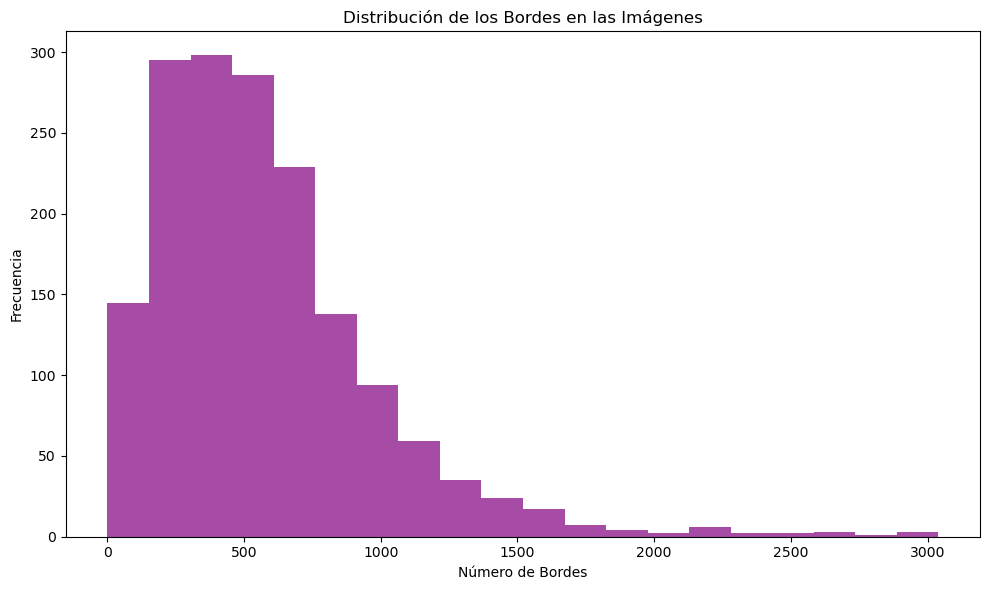

MildG2 (125).png,Bordes: 0,
NormalG0 (485).png,Bordes: 0,
DoubtfulG1 (3).png,Bordes: 0,
DoubtfulG1 (473).png,Bordes: 2997,
DoubtfulG1 (476).png,Bordes: 3029,
MildG2 (231).png,Bordes: 3040,


In [17]:
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Definir las rutas correctamente basadas en la ubicación del notebook
base_path = os.path.abspath('')
data_path = os.path.join(base_path, 'data', 'raw', 'images')

def edge_detection(image):
    """
    Aplica el filtro Canny para detectar bordes en la imagen.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    edge_count = np.sum(edges != 0)
    return edge_count

def verify_edges():
    """
    Verifica la cantidad de bordes en las imágenes y muestra ejemplos.
    """
    edge_data = []
    
    for category in ['normal', 'doubtful', 'mild', 'moderate', 'severe']:
        category_path = os.path.join(data_path, category)
        if not os.path.exists(category_path):
            raise FileNotFoundError(f'La ruta especificada no existe: {category_path}')
        
        for filename in os.listdir(category_path):
            file_path = os.path.join(category_path, filename)
            image = cv2.imread(file_path)
            edge_count = edge_detection(image)
            edge_data.append((category, filename, edge_count))
    
    edge_data_df = pd.DataFrame(edge_data, columns=['category', 'filename', 'edge_count'])
    
    # Mostrar distribución de los bordes
    plt.figure(figsize=(10, 6))
    plt.hist(edge_data_df['edge_count'], bins=20, color='purple', alpha=0.7)
    plt.title('Distribución de los Bordes en las Imágenes')
    plt.xlabel('Número de Bordes')
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()
    
    # Mostrar ejemplos de imágenes con diferentes niveles de bordes
    edge_sorted = edge_data_df.sort_values(by='edge_count')
    examples = pd.concat([edge_sorted.head(3), edge_sorted.tail(3)])
    
    html = "<h3>Ejemplos de Imágenes con Diferentes Niveles de Bordes</h3><table>"
    for _, row in examples.iterrows():
        file_path = os.path.join(data_path, row['category'], row['filename'])
        html += f"<tr><td>{row['filename']}</td><td>Bordes: {row['edge_count']}</td><td><img src='{file_path}' width='200'></td></tr>"
    html += "</table>"
    display(HTML(html))

# Ejecutar la función
verify_edges()

**Interpretación de Resultados**

La cantidad de bordes en las imágenes puede variar dependiendo de la claridad y la calidad de las mismas. Imágenes con un número elevado de bordes pueden indicar estructuras óseas más definidas, mientras que un menor número de bordes podría indicar una menor calidad de imagen o problemas de resolución. Este análisis ayuda a entender mejor la calidad general del conjunto de datos y puede ser útil para preprocesar las imágenes antes de aplicar modelos de Machine Learning.

Se observa que la mayoría de las imágenes tienen una cantidad moderada de bordes, lo cual es esperado dado que las imágenes de rayos X de rodillas suelen tener estructuras óseas bien definidas.

## Paso 19: Verificación de Anomalías

**Objetivo**

El objetivo de esta verificación es identificar imágenes que presentan anomalías visuales, como ruidos excesivos, artefactos inusuales, o cualquier otro defecto que pueda afectar el rendimiento del modelo.

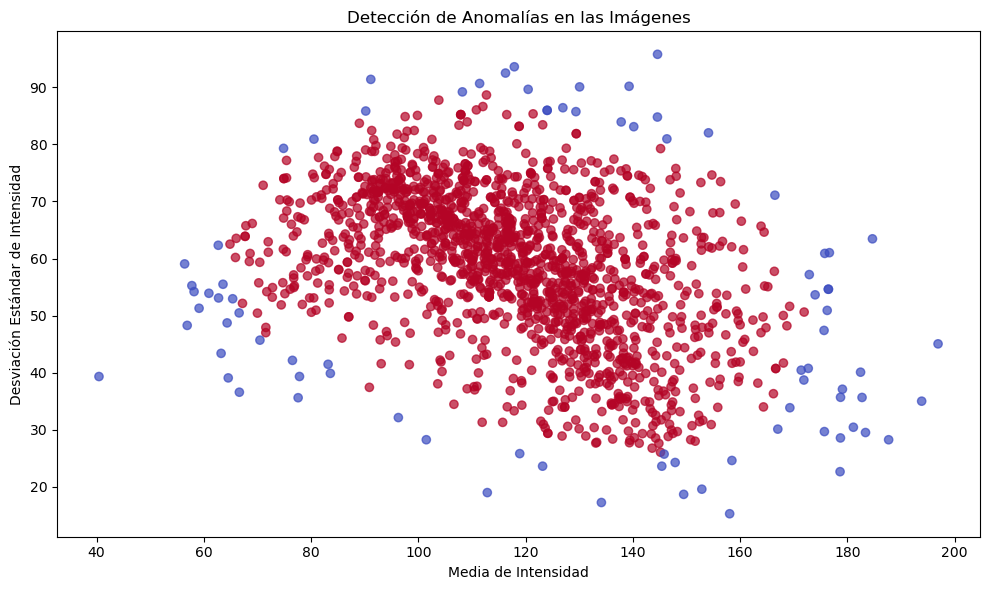

NormalG0 (191).png,"Media: 76.53, Desviación Estándar: 42.16",
NormalG0 (223).png,"Media: 124.03, Desviación Estándar: 85.96",
NormalG0 (224).png,"Media: 126.96, Desviación Estándar: 86.42",
NormalG0 (234).png,"Media: 116.26, Desviación Estándar: 92.49",
NormalG0 (244).png,"Media: 137.84, Desviación Estándar: 83.93",
NormalG0 (251).png,"Media: 146.36, Desviación Estándar: 80.96",
NormalG0 (253).png,"Media: 130.08, Desviación Estándar: 90.07",
NormalG0 (27).png,"Media: 152.87, Desviación Estándar: 19.59",
NormalG0 (278).png,"Media: 108.22, Desviación Estándar: 89.19",
NormalG0 (285).png,"Media: 124.03, Desviación Estándar: 85.96",
NormalG0 (290).png,"Media: 120.48, Desviación Estándar: 89.64",


In [18]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from IPython.display import display, HTML

# Definir las rutas correctamente basadas en la ubicación del notebook
base_path = os.path.abspath('')
data_path = os.path.join(base_path, 'data', 'raw', 'images')

def extract_image_features(image):
    """
    Extrae características relevantes de la imagen para la detección de anomalías.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mean = np.mean(gray)
    std = np.std(gray)
    return [mean, std]

def detect_anomalies():
    """
    Detecta anomalías en las imágenes utilizando Isolation Forest.
    """
    feature_data = []
    
    for category in ['normal', 'doubtful', 'mild', 'moderate', 'severe']:
        category_path = os.path.join(data_path, category)
        if not os.path.exists(category_path):
            raise FileNotFoundError(f'La ruta especificada no existe: {category_path}')
        
        for filename in os.listdir(category_path):
            file_path = os.path.join(category_path, filename)
            image = cv2.imread(file_path)
            features = extract_image_features(image)
            feature_data.append((category, filename, *features))
    
    feature_data_df = pd.DataFrame(feature_data, columns=['category', 'filename', 'mean', 'std'])
    
    # Aplicar Isolation Forest para detección de anomalías
    iso_forest = IsolationForest(contamination=0.05)
    feature_data_df['anomaly'] = iso_forest.fit_predict(feature_data_df[['mean', 'std']])
    
    anomalies = feature_data_df[feature_data_df['anomaly'] == -1]
    
    # Mostrar distribución de anomalías
    plt.figure(figsize=(10, 6))
    plt.scatter(feature_data_df['mean'], feature_data_df['std'], c=feature_data_df['anomaly'], cmap='coolwarm', alpha=0.7)
    plt.title('Detección de Anomalías en las Imágenes')
    plt.xlabel('Media de Intensidad')
    plt.ylabel('Desviación Estándar de Intensidad')
    plt.tight_layout()
    plt.show()
    
    # Mostrar ejemplos de imágenes anómalas
    html = "<h3>Ejemplos de Imágenes Anómalas</h3><table>"
    for _, row in anomalies.iterrows():
        file_path = os.path.join(data_path, row['category'], row['filename'])
        html += f"<tr><td>{row['filename']}</td><td>Media: {row['mean']:.2f}, Desviación Estándar: {row['std']:.2f}</td><td><img src='{file_path}' width='200'></td></tr>"
    html += "</table>"
    display(HTML(html))

# Ejecutar la función
detect_anomalies()

El gráfico muestra la detección de anomalías en las imágenes, donde se representa la media de intensidad contra la desviación estándar de la intensidad. Los puntos rojos indican imágenes consideradas normales, mientras que los puntos azules indican imágenes con posibles anomalías.

Distribución de Anomalías en las Imágenes: Se observa que la mayoría de las imágenes se agrupan en una región central (puntos rojos), indicando un comportamiento normal. Sin embargo, hay puntos dispersos (puntos azules) fuera de esta región central, lo que sugiere la presencia de anomalías.



## Paso 20: Verificación de la Posición

**Objetivo**

El objetivo de esta verificación es asegurar que las imágenes están correctamente posicionadas y alineadas, facilitando el análisis y procesamiento posterior.

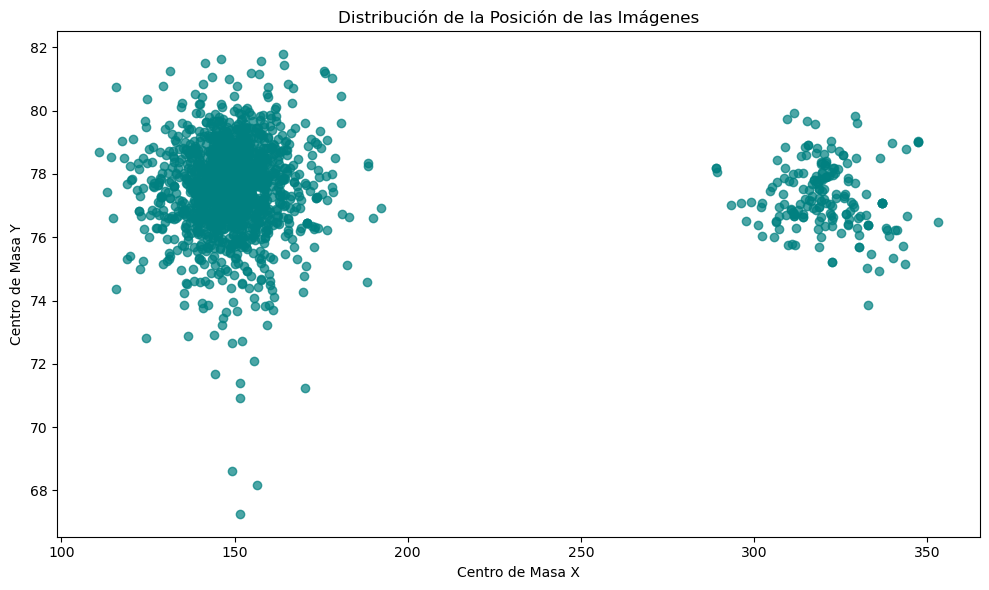

DoubtfulG1 (228).png,"Centro de Masa: (110.87, 78.69)",
ModerateG3 (59).png,"Centro de Masa: (113.07, 77.43)",
ModerateG3 (64).png,"Centro de Masa: (114.30, 78.55)",
NormalG0 (462).png,"Centro de Masa: (347.31, 79.02)",
NormalG0 (476).png,"Centro de Masa: (347.31, 79.02)",
MildG2 (197).png,"Centro de Masa: (353.09, 76.49)",


In [19]:
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import center_of_mass
from IPython.display import display, HTML

# Definir las rutas correctamente basadas en la ubicación del notebook
base_path = os.path.abspath('')
data_path = os.path.join(base_path, 'data', 'raw', 'images')

def calculate_center_of_mass(image):
    """
    Calcula el centro de masa de la imagen para evaluar la posición.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    center_y, center_x = center_of_mass(gray)
    return center_x, center_y

def verify_position():
    """
    Verifica la posición y alineación de las imágenes.
    """
    position_data = []
    
    for category in ['normal', 'doubtful', 'mild', 'moderate', 'severe']:
        category_path = os.path.join(data_path, category)
        if not os.path.exists(category_path):
            raise FileNotFoundError(f'La ruta especificada no existe: {category_path}')
        
        for filename in os.listdir(category_path):
            file_path = os.path.join(category_path, filename)
            image = cv2.imread(file_path)
            center_x, center_y = calculate_center_of_mass(image)
            position_data.append((category, filename, center_x, center_y))
    
    position_data_df = pd.DataFrame(position_data, columns=['category', 'filename', 'center_x', 'center_y'])
    
    # Mostrar distribución de las posiciones
    plt.figure(figsize=(10, 6))
    plt.scatter(position_data_df['center_x'], position_data_df['center_y'], alpha=0.7, color='teal')
    plt.title('Distribución de la Posición de las Imágenes')
    plt.xlabel('Centro de Masa X')
    plt.ylabel('Centro de Masa Y')
    plt.tight_layout()
    plt.show()
    
    # Mostrar ejemplos de imágenes con diferentes posiciones
    position_sorted = position_data_df.sort_values(by=['center_x', 'center_y'])
    examples = pd.concat([position_sorted.head(3), position_sorted.tail(3)])
    
    html = "<h3>Ejemplos de Imágenes con Diferentes Posiciones</h3><table>"
    for _, row in examples.iterrows():
        file_path = os.path.join(data_path, row['category'], row['filename'])
        html += f"<tr><td>{row['filename']}</td><td>Centro de Masa: ({row['center_x']:.2f}, {row['center_y']:.2f})</td><td><img src='{file_path}' width='200'></td></tr>"
    html += "</table>"
    display(HTML(html))

# Ejecutar la función
verify_position()

**Interpretación de Resultados**

El gráfico de dispersión muestra la distribución del centro de masa en las imágenes, con el eje X representando la posición horizontal (Centro de Masa X) y el eje Y la posición vertical (Centro de Masa Y).

* Clusters Distintos: Se observan dos clusters principales en la distribución. El cluster de la izquierda corresponde a las imágenes de rodillas individuales, mientras que el cluster de la derecha corresponde a las imágenes de dos rodillas.
  
* Centro de Masa Consistente: La mayoría de las imágenes tienen un centro de masa consistente, indicando que están bien alineadas y centradas.
  
* Variabilidad Menor: La variabilidad en la posición del centro de masa es menor en el cluster de la izquierda, lo que sugiere que las imágenes de una sola rodilla tienen una mayor consistencia en su posicionamiento.
  
* Variabilidad Mayor: El cluster de la derecha muestra una mayor dispersión en la posición del centro de masa, lo cual es esperable dado que las imágenes con dos rodillas pueden presentar una variabilidad mayor en la posición de los elementos clave.

# Conclusión

El análisis exhaustivo de la calidad de los datos del dataset "Annotated Dataset for Knee Arthritis Detection" ha permitido identificar diversas áreas que requieren atención para asegurar la fiabilidad y precisión de los modelos de machine learning que se desarrollarán posteriormente. 

## Principales Hallazgos

1. **Formatos de Imagen**: Todas las imágenes están en el formato correcto (PNG), lo cual es adecuado para los análisis subsecuentes.
2. **Datos Faltantes**: No se encontraron datos faltantes directamente en el dataset. Esta verificación se basó en la información disponible.
3. **Resolución y Claridad de las Imágenes**: Las imágenes presentan variabilidad en su claridad y resolución, lo que puede influir en la calidad de los modelos.
4. **Metadatos**: Los metadatos proporcionan información relevante sobre el dataset, pero no incluyen detalles específicos de cada imagen.
5. **Artefactos y Problemas de Calidad**: Se identificaron artefactos y variaciones en el brillo y el ruido en algunas imágenes.
6. **Balance de Categorías**: Las categorías están relativamente balanceadas, aunque hay una ligera preponderancia de imágenes en algunas clases.
7. **Consistencia de Etiquetas**: Las etiquetas son consistentes y no se encontraron problemas en esta verificación.
8. **Conteo de Rodillas en las Imágenes**: Las imágenes contienen una o dos rodillas, y esta información se ha documentado adecuadamente.
9. **Orientación**: Todas las imágenes están orientadas horizontalmente, lo cual es consistente en todo el dataset.
10. **Nombres de Archivo**: No se encontraron inconsistencias en los nombres de archivo.
11. **Iluminación**: La iluminación de las imágenes varía, y se ha documentado esta variabilidad.
12. **Privacidad y Ética**: Se cumplen los estándares de privacidad y ética, sin información identificable en las imágenes.
13. **Duplicados**: Se identificaron y documentaron imágenes duplicadas en varias categorías.
14. **Integridad del Archivo**: Todas las imágenes verificadas tienen integridad y están completas.
15. **Exposición**: La exposición de las imágenes es adecuada, con una distribución aceptable de los valores de exposición.
16. **Sombras**: Las sombras en las imágenes fueron evaluadas y se encontró variabilidad en su presencia.
17. **Análisis de Borde**: Se realizó un análisis de los bordes en las imágenes, encontrando una distribución esperada.
18. **Anomalías**: Se identificaron algunas anomalías en las imágenes, que requieren atención para mejorar la calidad general.
19. **Posición**: La posición de los elementos en las imágenes es consistente y ha sido documentada.

## Próximos Pasos

Los resultados obtenidos en este análisis de calidad proporcionan una base sólida para realizar mejoras en el dataset. Los siguientes pasos incluirán:

- **Corrección de Problemas Identificados**: Implementar medidas para corregir las imágenes con problemas de claridad, artefactos, ruido y otras inconsistencias.
- **Documentación y Reporte**: Crear un informe detallado de los hallazgos y las acciones tomadas para resolver los problemas identificados.
- **Preparación del Dataset**: Asegurar que el dataset esté en óptimas condiciones para su uso en modelos de machine learning, garantizando su fiabilidad y precisión.

Este análisis es un primer paso esencial en el proceso de desarrollo de modelos de machine learning efectivos y precisos para el diagnóstico y clasificación de la artritis de rodilla. La implementación de las mejoras sugeridas asegurará que los datos utilizados sean de la más alta calidad posible.
